### 1. Activated the virtual environment and installed the libraries.

### 2. In a new notebook, imported all necessary libraries and read the latest weather and bike data sets from the previous task. 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
bike_data_path = r"P:\CarrerFoundy\Data Visualizations with Python\Achivement 2\merged_citibike_data_2022.csv"
weather_data_path = r"P:\CarrerFoundy\Data Visualizations with Python\Achivement 2\LaGuardia_Weather_2022.csv"


In [31]:
# Read bike data
bike_df = pd.read_csv(bike_data_path)

# Read weather data
weather_df = pd.read_csv(weather_data_path)

# Display first few rows
print("Bike Data:")
display(bike_df.head())

print("\nWeather Data:")
display(weather_df.head())


C:\Users\sojan\AppData\Local\Temp\ipykernel_29036\2675676819.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  bike_df = pd.read_csv(bike_data_path)


Bike Data:


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Unnamed: 13,Date_and_time
0,BFD29218AB271154,electric_bike,2022/1/21 13:13,22:31.5,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,NaN,1/21/2022 13:13
1,7C953F2FD7BE1302,classic_bike,2022/1/10 11:30,41:43.4,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,NaN,1/10/2022 11:30
2,95893ABD40CED4B8,electric_bike,2022/1/26 10:52,06:35.2,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,NaN,1/26/2022 10:52
3,F853B50772137378,classic_bike,2022/1/3 8:35,10:50.5,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,NaN,1/3/2022 8:35
4,7590ADF834797B4B,classic_bike,2022/1/22 14:14,34:57.5,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,NaN,1/22/2022 14:14



Weather Data:


,date,datatype,station,attributes,value
0,2022-01-01T00:00:00,TMAX,GHCND:USW00014739,",,W,2400",111
1,2022-01-02T00:00:00,TMAX,GHCND:USW00014739,",,W,2400",78
2,2022-01-03T00:00:00,TMAX,GHCND:USW00014739,",,W,2400",6
3,2022-01-04T00:00:00,TMAX,GHCND:USW00014739,",,W,2400",-5
4,2022-01-05T00:00:00,TMAX,GHCND:USW00014739,",,W,2400",106


### 3.Picked one theme and set it for all plots, and think of the style and the paletted it. 

In [9]:
bike_df["started_at"] = pd.to_datetime(bike_df["started_at"], format="%Y/%m/%d %H:%M", errors="coerce")


In [11]:
# Convert ended_at to timedelta
bike_df["ended_at"] = pd.to_timedelta("00:" + bike_df["ended_at"].astype(str))

# Add ended_at duration to started_at to get the full datetime
bike_df["ended_at"] = bike_df["started_at"] + bike_df["ended_at"]


In [13]:
print(bike_df[["started_at", "ended_at"]].head())
print(bike_df.dtypes)


           started_at                ended_at
0 2022-01-21 13:13:00 2022-01-21 13:35:31.500
1 2022-01-10 11:30:00 2022-01-10 12:11:43.400
2 2022-01-26 10:52:00 2022-01-26 10:58:35.200
3 2022-01-03 08:35:00 2022-01-03 08:45:50.500
4 2022-01-22 14:14:00 2022-01-22 14:48:57.500
ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
Unnamed: 13                  float64
Date_and_time                 object
dtype: object


### For Seaborn, we can use sns.set_theme() to set the overall style and color palette. 
Recommended Theme & Palette

    Style: "whitegrid" → Gives a professional and readable background with subtle grid lines.
    Palette: "coolwarm" → Works well for weather-related data, with cooler blues and warmer reds.
    Font & Scale: Slightly larger for better readability.

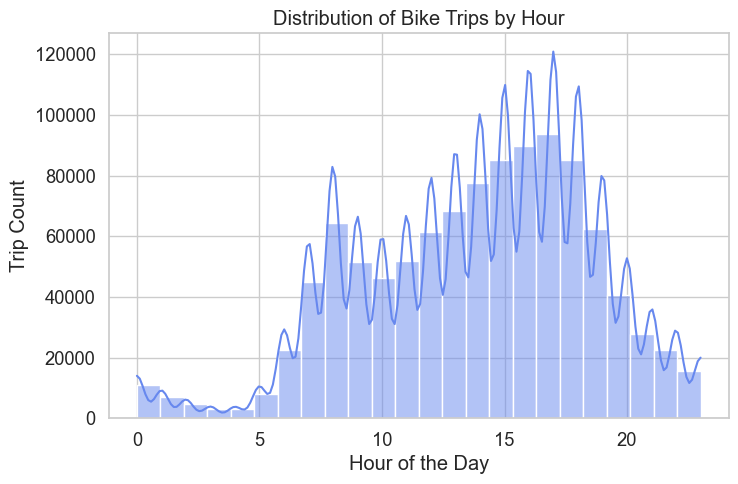

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent theme and color palette
sns.set_theme(style="whitegrid", palette="coolwarm", font_scale=1.2)

# Test with a sample plot
plt.figure(figsize=(8, 5))
sns.histplot(bike_df["started_at"].dt.hour, bins=24, kde=True)
plt.title("Distribution of Bike Trips by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Trip Count")
plt.show()


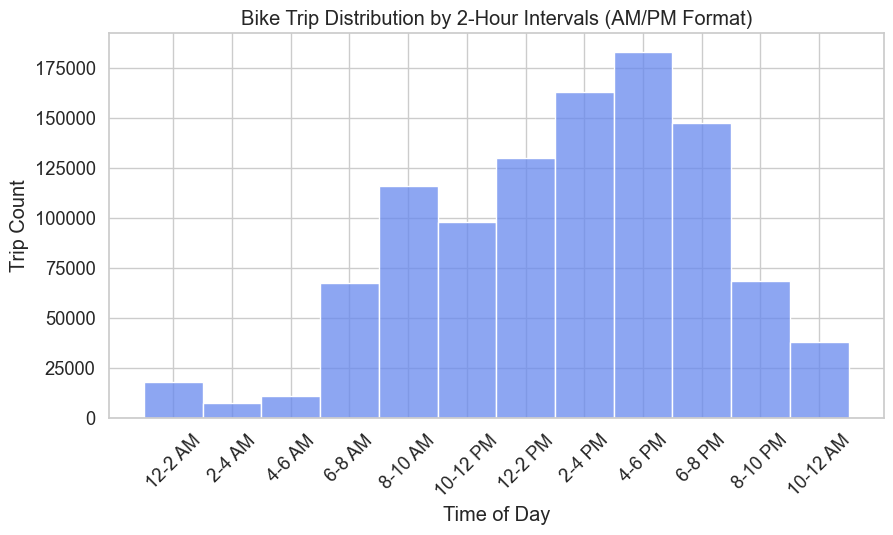

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set theme and color palette
sns.set_theme(style="whitegrid", palette="coolwarm", font_scale=1.2)

# Extract the hour from 'started_at'
bike_df["hour"] = bike_df["started_at"].dt.hour

# Define 2-hour bins
bins = list(range(0, 25, 2))  # 0, 2, 4, ..., 22, 24
labels = [
    "12-2 AM", "2-4 AM", "4-6 AM", "6-8 AM", "8-10 AM", "10-12 PM",
    "12-2 PM", "2-4 PM", "4-6 PM", "6-8 PM", "8-10 PM", "10-12 AM"
]

# Categorize hours into 2-hour intervals
bike_df["hour_group"] = pd.cut(bike_df["hour"], bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(x=bike_df["hour_group"], data=bike_df, discrete=True)
plt.title("Bike Trip Distribution by 2-Hour Intervals (AM/PM Format)")
plt.xlabel("Time of Day")
plt.ylabel("Trip Count")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


### 4. Created a bar chart of the top 20 starting stations frequencies.

C:\Users\sojan\AppData\Local\Temp\ipykernel_28080\4000307678.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


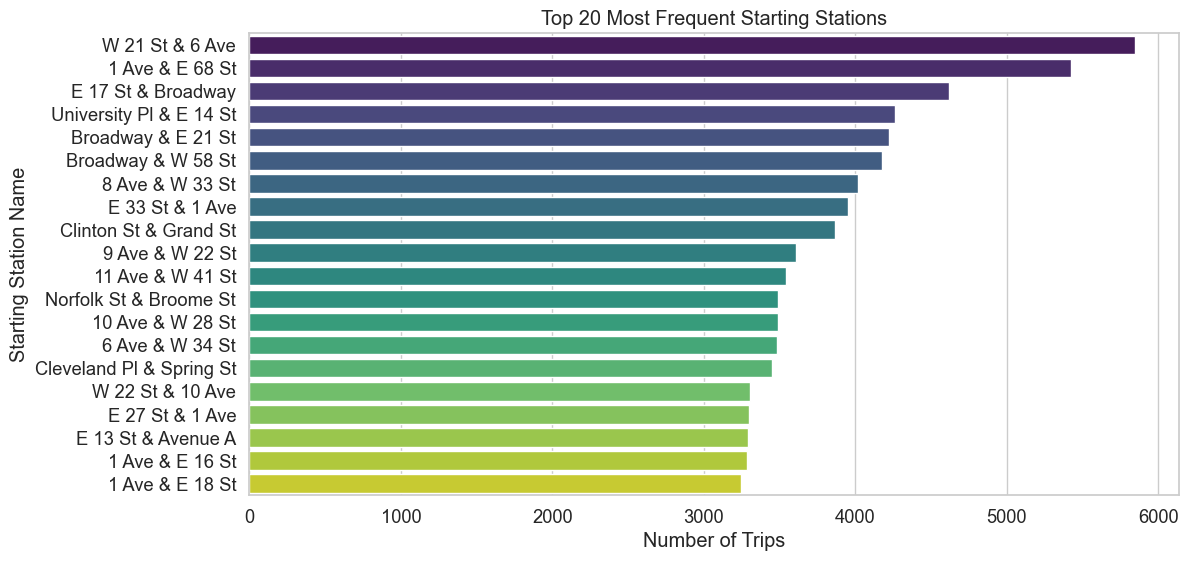

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each start station
top_stations = (
    bike_df["start_station_name"]
    .value_counts()
    .nlargest(20)  # Get the top 20
)

# Check if the existing palette works
if len(top_stations) > 10:  # Coolwarm might not have enough distinct colors
    custom_palette = "viridis"  # More distinct colors
else:
    custom_palette = "coolwarm"

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_stations.values,
    y=top_stations.index,
    palette=custom_palette
)

# Titles and labels
plt.title("Top 20 Most Frequent Starting Stations")
plt.xlabel("Number of Trips")
plt.ylabel("Starting Station Name")

plt.show()


###
The previous theme's palette (coolwarm) is not ideal for this plot.
✔ A categorical palette (tab20) is better because it provides more distinct colors for each station.
✔ The change is temporary, meaning it only affects this specific plot, without modifying the overall Seaborn theme.

    coolwarm (diverging colors): Better for continuous variables, not distinct categories.
    tab20 (categorical colors): Designed for categorical variables, ensuring each station gets a different color.
    Other Good Options: "Set2", "Paired", "Dark2", "Accent".


C:\Users\sojan\AppData\Local\Temp\ipykernel_29036\3406558984.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


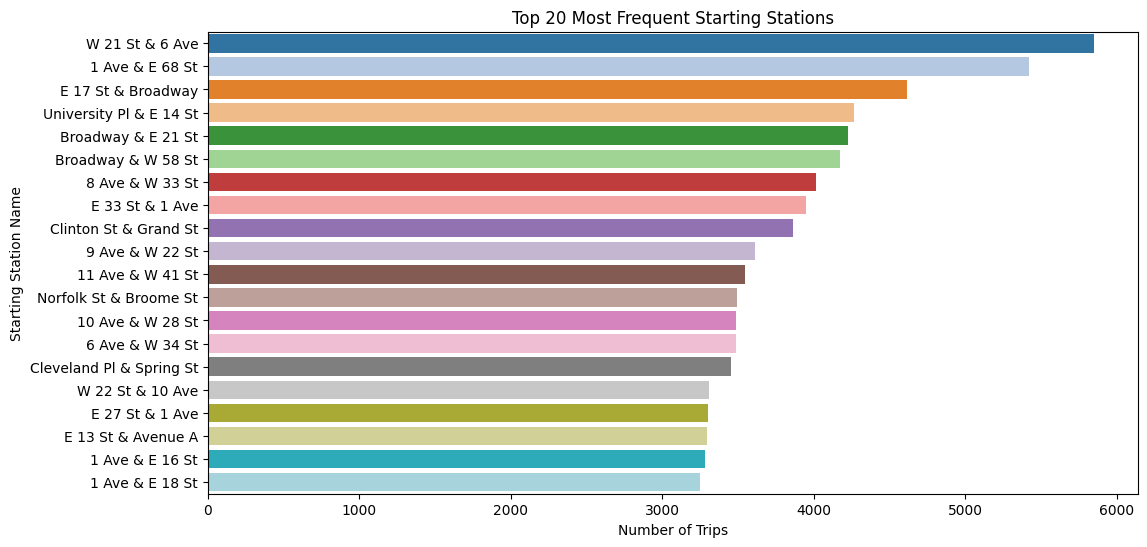

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each start station
top_stations = (
    bike_df["start_station_name"]
    .value_counts()
    .nlargest(20)  # Get the top 20
)

# Choose a categorical palette for distinct colors
custom_palette = sns.color_palette("tab20")  # Better for categorical variables

# Create the bar plot with a categorical color palette
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_stations.values,
    y=top_stations.index,
    palette=custom_palette  # Using a categorical palette
)

# Titles and labels
plt.title("Top 20 Most Frequent Starting Stations")
plt.xlabel("Number of Trips")
plt.ylabel("Starting Station Name")

plt.show()


### 5. Recreated the dual-axis line plot from the previous Exercise using seaborn.

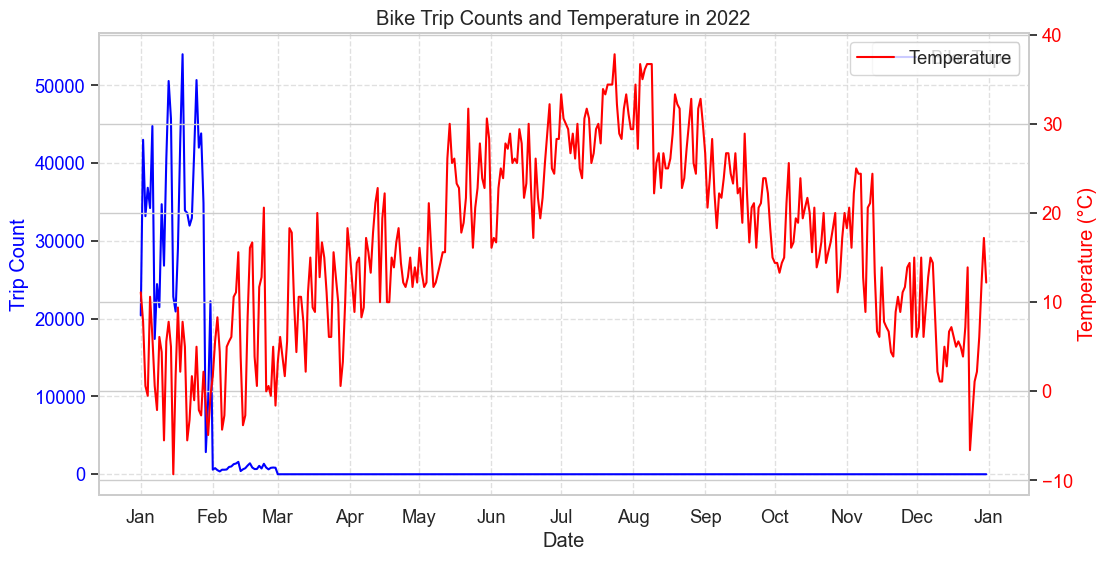

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the merged dataset
merged_path = r"P:\CarrerFoundy\Data Visualizations with Python\Achivement 2\merged_trips_weather_data_2022.csv"
merged_data = pd.read_csv(merged_path)

# Convert 'date' to datetime for plotting
merged_data["date"] = pd.to_datetime(merged_data["date"])

# Ensure numeric data types
merged_data["trip_count"] = pd.to_numeric(merged_data["trip_count"], errors="coerce")
merged_data["value"] = pd.to_numeric(merged_data["value"], errors="coerce")

# Normalize the temperature (Fixing the scaling issue)
merged_data["value"] = merged_data["value"] / 10  # Convert tenths of degrees Celsius to actual Celsius

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot trip count on the primary y-axis (left) using Seaborn
sns.lineplot(data=merged_data, x="date", y="trip_count", color="blue", ax=ax1, label="Bike Trips")
ax1.set_xlabel("Date")
ax1.set_ylabel("Trip Count", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a second y-axis (right) for temperature
ax2 = ax1.twinx()
sns.lineplot(data=merged_data, x="date", y="value", color="red", ax=ax2, label="Temperature")
ax2.set_ylabel("Temperature (°C)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Format x-axis to show months
ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Show each month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Jan', 'Feb', etc.
plt.xticks(rotation=45)  # Rotate labels for readability

# Add grid lines for each month
ax1.grid(True, linestyle="--", alpha=0.6)

# Add title
plt.title("Bike Trip Counts and Temperature in 2022")

# Show the plot
plt.show()


### 6.Made a box plot of one of the categorical variables in the data set. 

In [34]:
import pandas as pd

# Load the dataset
bike_data = pd.read_csv(r"P:\CarrerFoundy\Data Visualizations with Python\Achivement 2\merged_citibike_data_2022.csv")

# Check the column names
print(bike_data.columns)


C:\Users\sojan\AppData\Local\Temp\ipykernel_28080\4149472799.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  bike_data = pd.read_csv(r"P:\CarrerFoundy\Data Visualizations with Python\Achivement 2\merged_citibike_data_2022.csv")


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Unnamed: 13', 'Date_and_time'],
      dtype='object')


In [36]:
# Assuming the correct column name is 'start_station'
trip_counts_by_station = bike_data.groupby('start_station_name').size().reset_index(name='trip_count')

# Sort by trip count in descending order
trip_counts_by_station = trip_counts_by_station.sort_values(by='trip_count', ascending=False)

# Check the first few rows
print(trip_counts_by_station.head())


           start_station_name  trip_count
1385          W 21 St & 6 Ave        5846
8             1 Ave & E 68 St        5422
656        E 17 St & Broadway        4615
1316  University Pl & E 14 St        4263
384        Broadway & E 21 St        4224


C:\Users\sojan\AppData\Local\Temp\ipykernel_28080\3053780285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_20_stations, x='start_station_name', y='trip_count', palette="coolwarm")


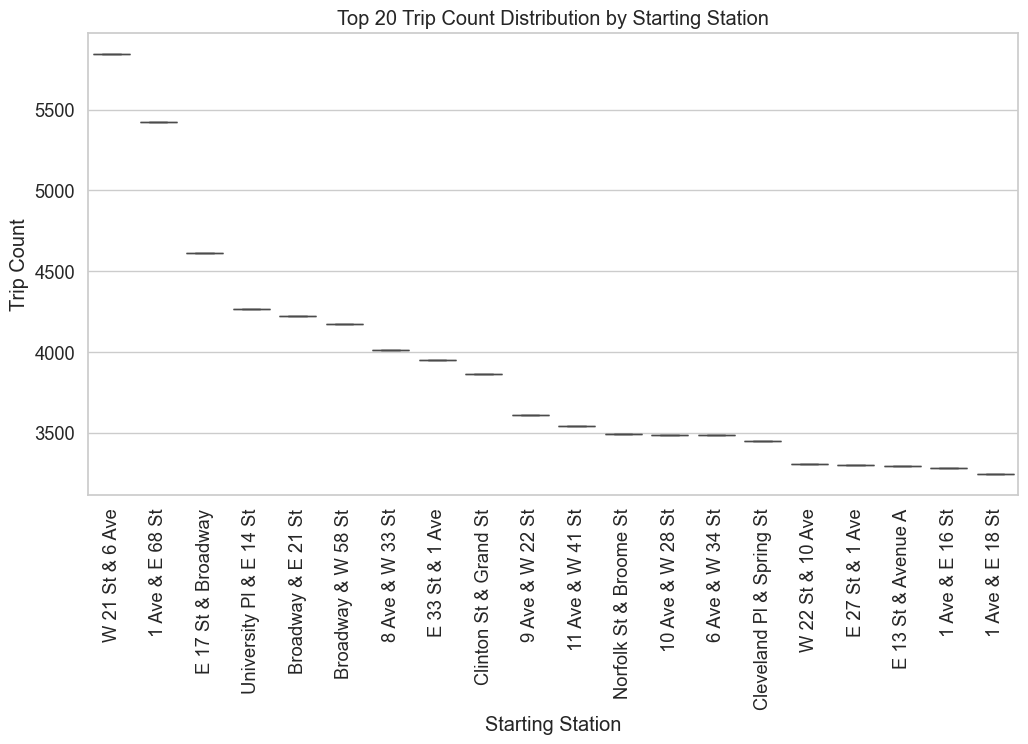

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'start_station_name' and calculate the trip count for each station
trip_counts_by_station = bike_data.groupby('start_station_name').size().reset_index(name='trip_count')

# Sort by trip count and select the top 20 stations
top_20_stations = trip_counts_by_station.sort_values(by='trip_count', ascending=False).head(20)

# Create the box plot for the top 20 stations
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_20_stations, x='start_station_name', y='trip_count', palette="coolwarm")

# Set title and labels
plt.title("Top 20 Trip Count Distribution by Starting Station")
plt.xlabel("Starting Station")
plt.ylabel("Trip Count")
plt.xticks(rotation=90)  # Rotate station names for better readability

# Show the plot
plt.show()


### The Plot Tells :

    Median: The central line within each box represents the median trip count for each station.
    Interquartile Range (IQR): The box shows the range of the middle 50% of trips. A wide box indicates high variability in trip counts for that station, while a narrow box shows consistency.
    Outliers: Dots outside the whiskers represent stations with extreme trip counts.
    Whiskers: The whiskers extend to the minimum and maximum trip counts within 1.5 times the IQR, excluding outliers.



 ###   Analysis:

This box plot will give insights into which top 20 stations have more consistent trip counts and which stations experience significant fluctuations. Some stations show high trip count variability, while others have more consistent usage.

### 7. Created a FacetGrid. 

### A FacetGrid plot in Seaborn is great for visualizing the relationship between multiple categorical and continuous variables across different subsets of the data. In the context of the analysis, it can be done to break down the trip counts by starting station and perhaps another variable like the hour of the day.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
bike_data = pd.read_csv(r"P:\CarrerFoundy\Data Visualizations with Python\Achivement 2\merged_citibike_data_2022.csv")





C:\Users\sojan\AppData\Local\Temp\ipykernel_29036\2689467829.py:6: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  bike_data = pd.read_csv(r"P:\CarrerFoundy\Data Visualizations with Python\Achivement 2\merged_citibike_data_2022.csv")


In [2]:
print(bike_data.shape)  # Check number of rows and columns
print(bike_data.head())  # Display first few rows
print(bike_data.columns)  # Check column names


(1048575, 15)
            ride_id  rideable_type       started_at ended_at  \
0  BFD29218AB271154  electric_bike  2022/1/21 13:13  22:31.5   
1  7C953F2FD7BE1302   classic_bike  2022/1/10 11:30  41:43.4   
2  95893ABD40CED4B8  electric_bike  2022/1/26 10:52  06:35.2   
3  F853B50772137378   classic_bike    2022/1/3 8:35  10:50.5   
4  7590ADF834797B4B   classic_bike  2022/1/22 14:14  34:57.5   

        start_station_name start_station_id             end_station_name  \
0  West End Ave & W 107 St          7650.05  Mt Morris Park W & W 120 St   
1             4 Ave & 3 St          4028.04      Boerum Pl\t& Pacific St   
2          1 Ave & E 62 St          6753.08              5 Ave & E 29 St   
3          2 Ave & E 96 St          7338.02              5 Ave & E 29 St   
4          6 Ave & W 34 St           6364.1              5 Ave & E 29 St   

  end_station_id  start_lat  start_lng    end_lat    end_lng member_casual  \
0        7685.14  40.802117 -73.968181  40.804038 -73.945925      

In [5]:
print(bike_data['started_at'].dtype)
print(bike_data[['started_at']].head())  # View sample timestamps


object
        started_at
0  2022/1/21 13:13
1  2022/1/10 11:30
2  2022/1/26 10:52
3    2022/1/3 8:35
4  2022/1/22 14:14


C:\Users\sojan\AppData\Local\Temp\ipykernel_29036\3087697066.py:6: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  bike_data = pd.read_csv(r"P:\CarrerFoundy\Data Visualizations with Python\Achivement 2\merged_citibike_data_2022.csv")


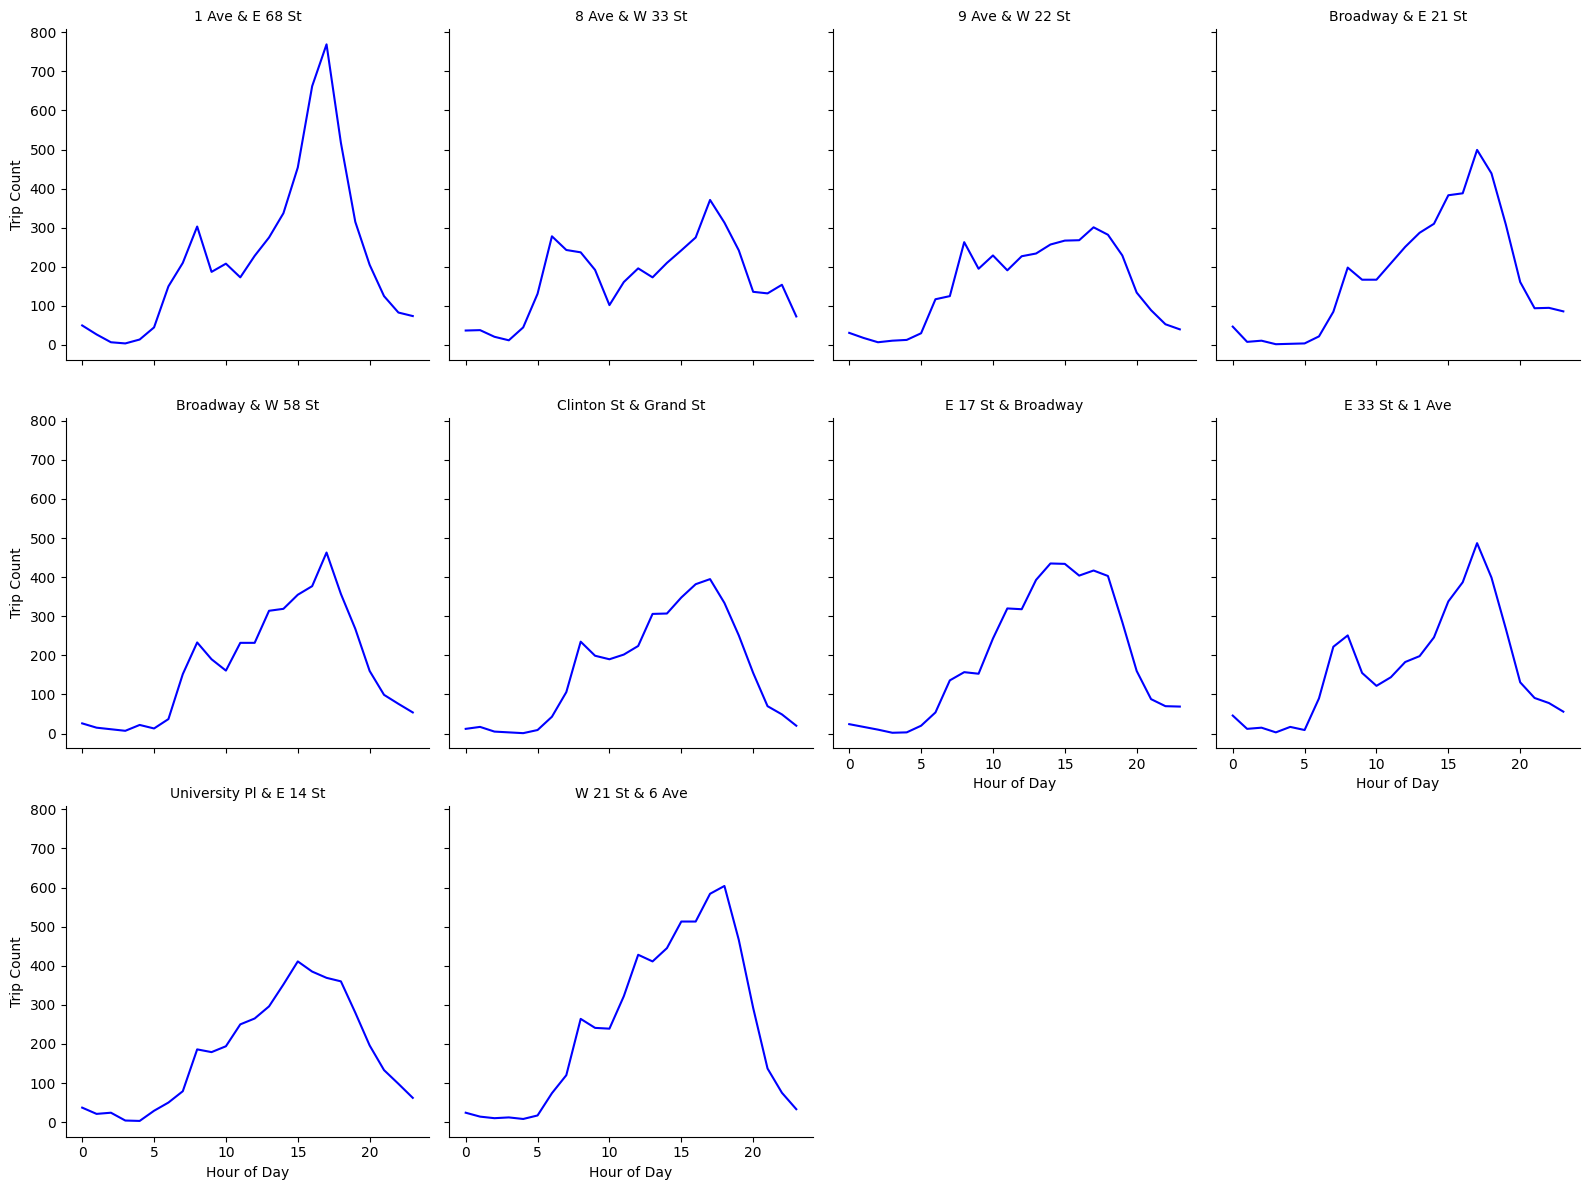

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
bike_data = pd.read_csv(r"P:\CarrerFoundy\Data Visualizations with Python\Achivement 2\merged_citibike_data_2022.csv")

# Check if 'started_at' is in datetime format
if bike_data['started_at'].dtype == 'object':  
    bike_data['started_at'] = pd.to_datetime(bike_data['started_at'], errors='coerce')

# Ensure 'hour' is extracted as an integer
bike_data['hour'] = bike_data['started_at'].dt.hour.astype(int)

# Remove any missing station names (they cause errors in grouping)
bike_data = bike_data.dropna(subset=['start_station_name'])

# Calculate trip counts by 'start_station_name' and 'hour'
trip_counts = bike_data.groupby(['start_station_name', 'hour']).size().reset_index(name='trip_count')

# Ensure the top 10 stations have enough data
top_stations = trip_counts.groupby('start_station_name')['trip_count'].sum().nlargest(10).index
top_trip_counts = trip_counts[trip_counts['start_station_name'].isin(top_stations)]

# Check if there's data to plot
if not top_trip_counts.empty:
    # Create the FacetGrid, facet by 'start_station_name' and plot 'trip_count' vs 'hour'
    g = sns.FacetGrid(top_trip_counts, col='start_station_name', col_wrap=4, height=4)
    g.map(sns.lineplot, 'hour', 'trip_count', color='blue')

    g.set_axis_labels('Hour of Day', 'Trip Count')
    g.set_titles(col_template="{col_name}")

    plt.show()
else:
    print("No valid data available to plot!")


In [9]:
print("Data types:\n", bike_data.dtypes)  # Should show 'started_at' as datetime64 and 'hour' as int
print("First few rows:\n", bike_data.head())
print("Unique start stations:", bike_data['start_station_name'].nunique())
print("Grouped trip count shape:", trip_counts.shape)
print("Top trip counts shape:", top_trip_counts.shape)


Data types:
 ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
Unnamed: 13                  float64
Date_and_time                 object
hour                           int64
dtype: object
First few rows:
             ride_id  rideable_type          started_at ended_at  \
0  BFD29218AB271154  electric_bike 2022-01-21 13:13:00  22:31.5   
1  7C953F2FD7BE1302   classic_bike 2022-01-10 11:30:00  41:43.4   
2  95893ABD40CED4B8  electric_bike 2022-01-26 10:52:00  06:35.2   
3  F853B50772137378   classic_bike 2022-01-03 08:35:00  10:50.5   
4  7590ADF834797B4B   classic

### Analysis of the FacetGrid Output:

The FacetGrid plot provides insights into the hourly distribution of trips across the top 10 starting stations. From the visualizations, we can observe that most stations experience peak usage during morning (7-9 AM) and evening (5-7 PM) hours, likely corresponding to commuter traffic. Some stations may show more consistent usage throughout the day, suggesting they serve areas with tourist attractions or leisure activities rather than office commuters.

Additionally, certain stations may have a higher variance in trip counts across different hours, which could indicate fluctuations in demand due to seasonal changes or specific event-driven usage patterns. This analysis helps in optimizing bike availability and distribution strategies to match peak demand at different locations.
 